In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib notebook

In [4]:
import numpy as np

In [10]:
data = np.arange(10)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

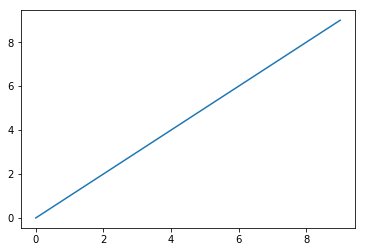

In [12]:
plt.plot(data)

### 图片和子图

In [ ]:
# 生成一个新的空白图片
fig = plt.figure()

In [13]:
# 创建三个子图(2*2个中的3个)
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

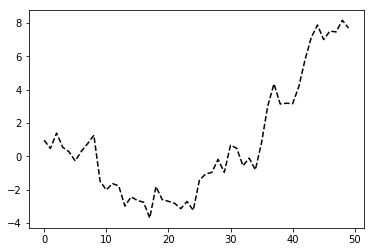

In [18]:
# matplotlib会在最后一个图片和子图绘制
# k--是绘制黑色分断线的style选项
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [19]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [20]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

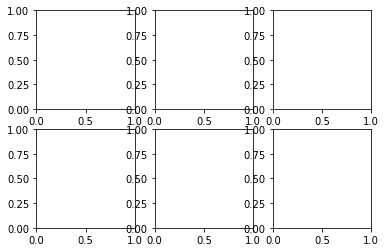

In [22]:
fig, axes = plt.subplots(2, 3)

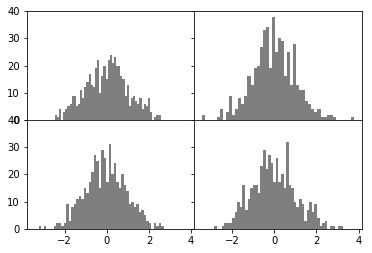

In [32]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2): 
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
# 图片的宽度(wspace)和高度(hspace)百分比
plt.subplots_adjust(wspace=0, hspace=0)

### 颜色,标记和线类型

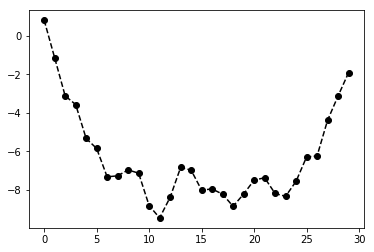

In [45]:
# ko 黑色凸点
ax = plt.plot(np.random.randn(30).cumsum(), 'ko--')
ax

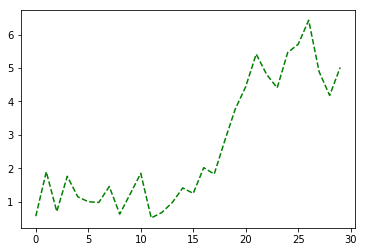

In [50]:
ax0 = plt.subplot()
ax0.plot(np.random.randn(30).cumsum(), 'g--')

<IPython.core.display.Javascript object>


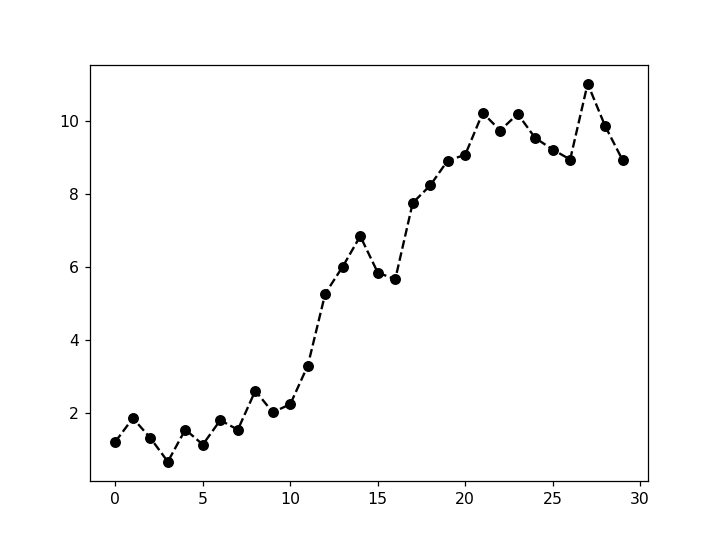

In [14]:
ax = plt.subplot()
# linestyle 线条样式
# ax.plot(np.random.randn(30).cumsum(),'o', linestyle='--', color='#CECECE')
ax.plot(np.random.randn(30).cumsum(), linestyle='dashed', color='k', marker='o')

<IPython.core.display.Javascript object>


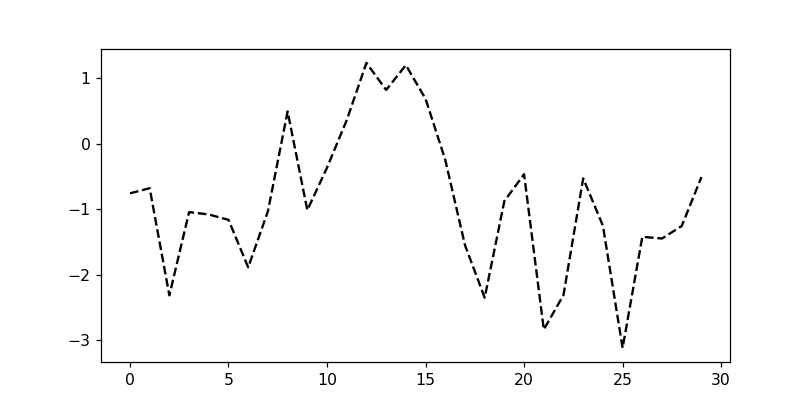

In [15]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

<IPython.core.display.Javascript object>


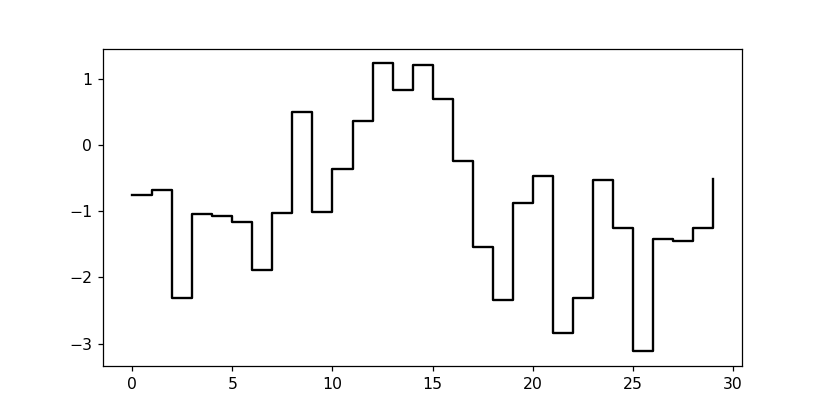

In [27]:
# drawstyle 修改线类型
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

<IPython.core.display.Javascript object>


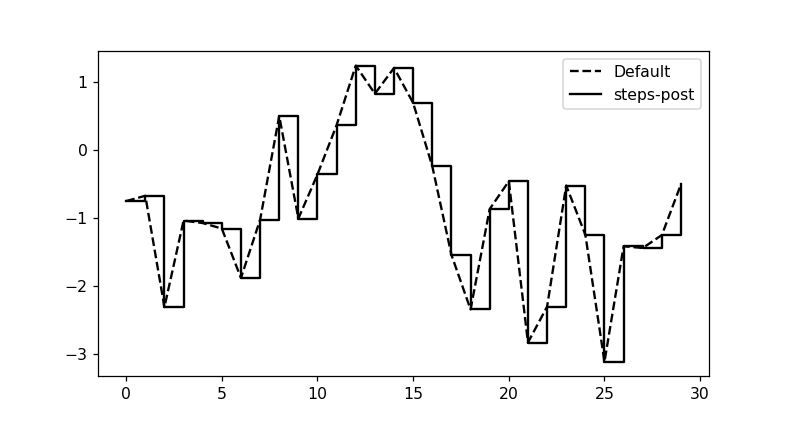

In [24]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
# 生成区分每条线的图例
plt.legend(loc='best')

### 刻度,标签和图例

#### 设置标题,轴标签和刻度标签

<IPython.core.display.Javascript object>


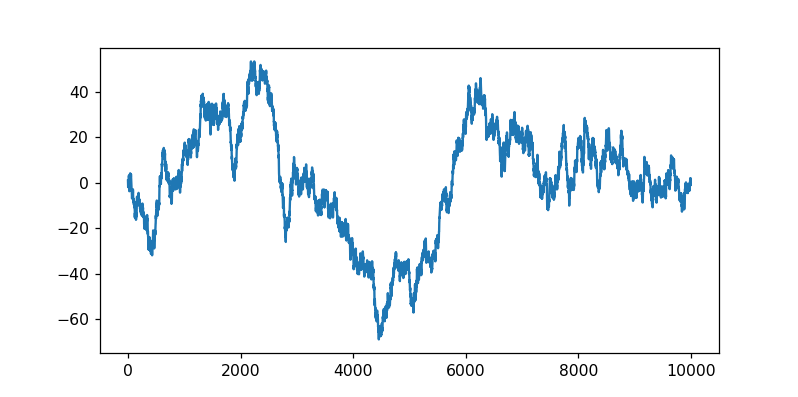

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(10000).cumsum())

In [6]:
ticks = ax.set_xticks([0, 2500, 5000, 7500, 1000])

In [7]:
# rotation=30将x轴刻度标签旋转30度,
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

In [8]:
ax.set_title('My first matplotlib plot')

Text(0.5,1,'My first matplotlib plot')

In [9]:
ax.set_xlabel('Stages')

Text(0.5,11.4962,'Stages')

In [45]:
# 批量设置绘图属性
props = {
    'title': 'My first matplotlib plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5,3.2,'Stages'), Text(0.5,1,'My first matplotlib plot')]

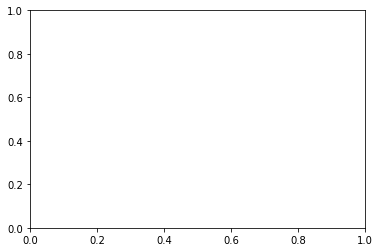

In [46]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

#### 添加图例

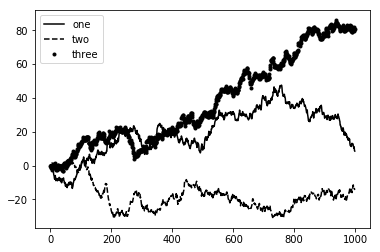

In [52]:
plt.plot(np.random.randn(1000).cumsum(), 'k', label='one')
plt.plot(np.random.randn(1000).cumsum(), 'k--', label='two')
plt.plot(np.random.randn(1000).cumsum(), 'k.', label='three')
plt.legend(loc='best')

In [53]:
plt.legend?

### 注释与子图加工

In [55]:
from datetime import datetime
import pandas as pd

Text(0.5,1,'Important dates in the 2008~2009 financial crisis')

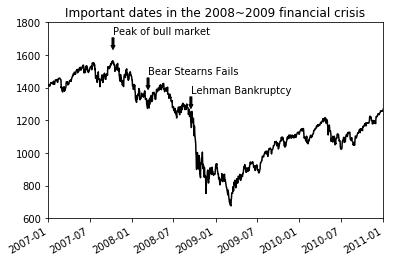

In [69]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# index_col 用作结果中行索引的列号或列名
# parse_dates 解析所有日期
data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    # annotate在指定的x和y坐标上绘制标签
    ax.annotate(label, 
                # 箭头位置
                xy=(date, spx.asof(date) + 80),
                # 文本位置
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment='left', verticalalignment='top'
               )
# 放大2007年~2010年
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008~2009 financial crisis')

In [62]:
pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True).head()

,SPX
1990-02-01 00:00:00,328.79
1990-02-02 00:00:00,330.92
1990-02-05 00:00:00,331.85
1990-02-06 00:00:00,329.66
1990-02-07 00:00:00,333.75


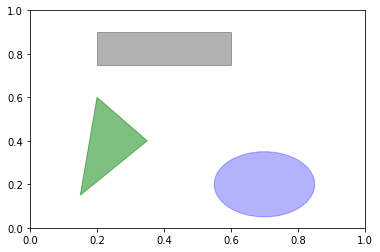

In [70]:
# 添加图形

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 将图片保存到文件

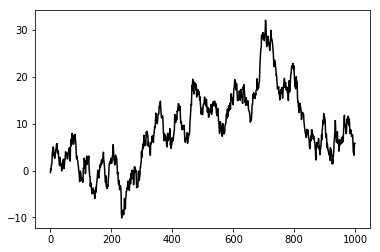

In [82]:
plt.plot(np.random.randn(1000).cumsum(), 'k', label='one')
# 保存图片
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### matplotlib设置

In [ ]:
# figsize 全局默认数字大小
plt.rc('figure', figsize='10, 10')

In [ ]:
font_options = {
    'family': 'monospace',
    'weight': 'bold',
    'size': 'small'
}
plt.rc('font', **font_options)